Global Imports for the project.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

Import all raw data into a dataframe and display the first 5 rows as a sanity check.

In [21]:
# Import data
file_path = "dataset_full.csv"
phishing_df = pd.read_csv ( file_path )
phishing_df.head (20 )

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
5,1,0,0,2,0,0,0,0,0,0,...,1,3,3,3591,1,0,0,0,0,1
6,2,0,0,0,0,0,0,0,0,0,...,1,2,2,291,0,0,0,0,0,0
7,2,0,0,3,0,0,0,0,0,0,...,1,2,1,3134,1,0,0,0,0,0
8,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3596,1,1,0,0,0,0
9,1,0,0,2,0,0,0,0,0,0,...,1,2,1,14397,1,0,0,0,0,1


In [20]:
phishing_df.dtypes

qty_dot_url             int64
qty_hyphen_url          int64
qty_underline_url       int64
qty_slash_url           int64
qty_questionmark_url    int64
                        ...  
qty_redirects           int64
url_google_index        int64
domain_google_index     int64
url_shortened           int64
phishing                int64
Length: 112, dtype: object

In [22]:
legitimate_count = ( phishing_df['phishing'] == 0 ).sum ()
phishing_count = ( phishing_df['phishing'] == 1 ).sum ()

print ( f"Total legitimate websites: {legitimate_count}" )
print ( f"Total phishing websites: {phishing_count}" )

Total legitimate websites: 58000
Total phishing websites: 30647


In [6]:
zero_directory_length_count = ( phishing_df['directory_length'] == 0 ).sum ()

zero_file_length_count = ( phishing_df['file_length'] == 0 ).sum ()

zero_parameters_length_count = ( phishing_df['params_length'] == 0 ).sum ()

print ( f"Number of rows where directory length is 0: {zero_directory_length_count}" )
print ( f"Number of rows where file length is 0: {zero_file_length_count}" )
print ( f"Number of rows where parameters length is 0: {zero_parameters_length_count}" )

Number of rows where directory length is 0: 0
Number of rows where file length is 0: 19624
Number of rows where parameters length is 0: 0


In [18]:
#small_rows = phishing_df[(phishing_df['length_url'] >= 0) & (phishing_df['length_url'] <= 50) & (phishing_df['phishing'] == 1)]
#one_to_fifty_count = small_rows.shape[0]
#display ( small_rows )

one_to_fifty_count = phishing_df[(phishing_df['length_url'] >= 0) & (phishing_df['length_url'] <= 50) & (phishing_df['phishing'] == 1)].shape[0]

fiftyone_to_onehundred_count = phishing_df[(phishing_df['length_url'] >= 51) & (phishing_df['length_url'] <= 100) & (phishing_df['phishing'] == 1)].shape[0]

onehundredone_to_onehundredfifty_count = phishing_df[(phishing_df['length_url'] >= 101) & (phishing_df['length_url'] <= 150) & (phishing_df['phishing'] == 1)].shape[0]

greater_than_onehundredfifty_count = phishing_df[(phishing_df['length_url'] >= 151) & (phishing_df['phishing'] == 1)].shape[0]


print ( f"Number of phishing positive rows where lenght of URL is 1-50 characters: {one_to_fifty_count}" )
print ( f"Number of phishing positive rows where lenght of URL is 51-100 characters: {fiftyone_to_onehundred_count}" )
print ( f"Number of phishing positive rows where lenght of URL is 101-150 characters: {onehundredone_to_onehundredfifty_count}" )
print ( f"Number of phishing positive rows where lenght of URL is > 150 characters: {greater_than_onehundredfifty_count}" )

Number of phishing positive rows where lenght of URL is 1-50 characters: 16863
Number of phishing positive rows where lenght of URL is 51-100 characters: 9497
Number of phishing positive rows where lenght of URL is 101-150 characters: 1983
Number of phishing positive rows where lenght of URL is > 150 characters: 2304


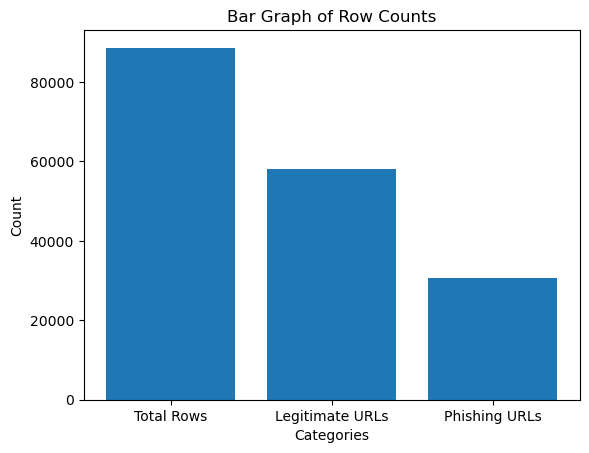

In [25]:
total_rows = phishing_df.shape[0]

counts = [total_rows, legitimate_count, phishing_count]
labels = ['Total Rows', 'Legitimate URLs', 'Phishing URLs']

plt.bar ( labels, counts )
plt.xlabel ( 'Categories' )
plt.ylabel ( 'Count' )
plt.title ( 'Legitimate/Phishing URL Summary' )
plt.show ()